# ImmoEliza Project - Part 3: Regression 

# Step 2: Feature Engineering

In [1]:
# Import cleaned & encoded data

import pandas as pd

df_encoded = pd.read_csv("./data/1_cleaned_data.csv")

In [2]:
df_encoded.columns

Index(['zip_code', 'commune', 'province', 'type_of_property',
       'subtype_of_property', 'price', 'building_condition', 'facade_number',
       'living_area', 'equipped_kitchen', 'bedroom_nr', 'swimming_pool',
       'furnished', 'open_fire', 'terrace', 'garden', 'plot_surface'],
      dtype='object')

In [3]:
# Checking data types
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26102 entries, 0 to 26101
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_code             26102 non-null  int64  
 1   commune              26102 non-null  object 
 2   province             26102 non-null  object 
 3   type_of_property     26102 non-null  int64  
 4   subtype_of_property  26102 non-null  int64  
 5   price                26102 non-null  float64
 6   building_condition   26102 non-null  int64  
 7   facade_number        26102 non-null  int64  
 8   living_area          26102 non-null  int64  
 9   equipped_kitchen     26102 non-null  int64  
 10  bedroom_nr           26102 non-null  int64  
 11  swimming_pool        26102 non-null  int64  
 12  furnished            26102 non-null  int64  
 13  open_fire            26102 non-null  int64  
 14  terrace              26102 non-null  int64  
 15  garden               26102 non-null 

### Checking Data Distribution

C:\Users\mstoe\AppData\Local\Temp\ipykernel_26780\412983406.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_encoded.hist(ax=ax)


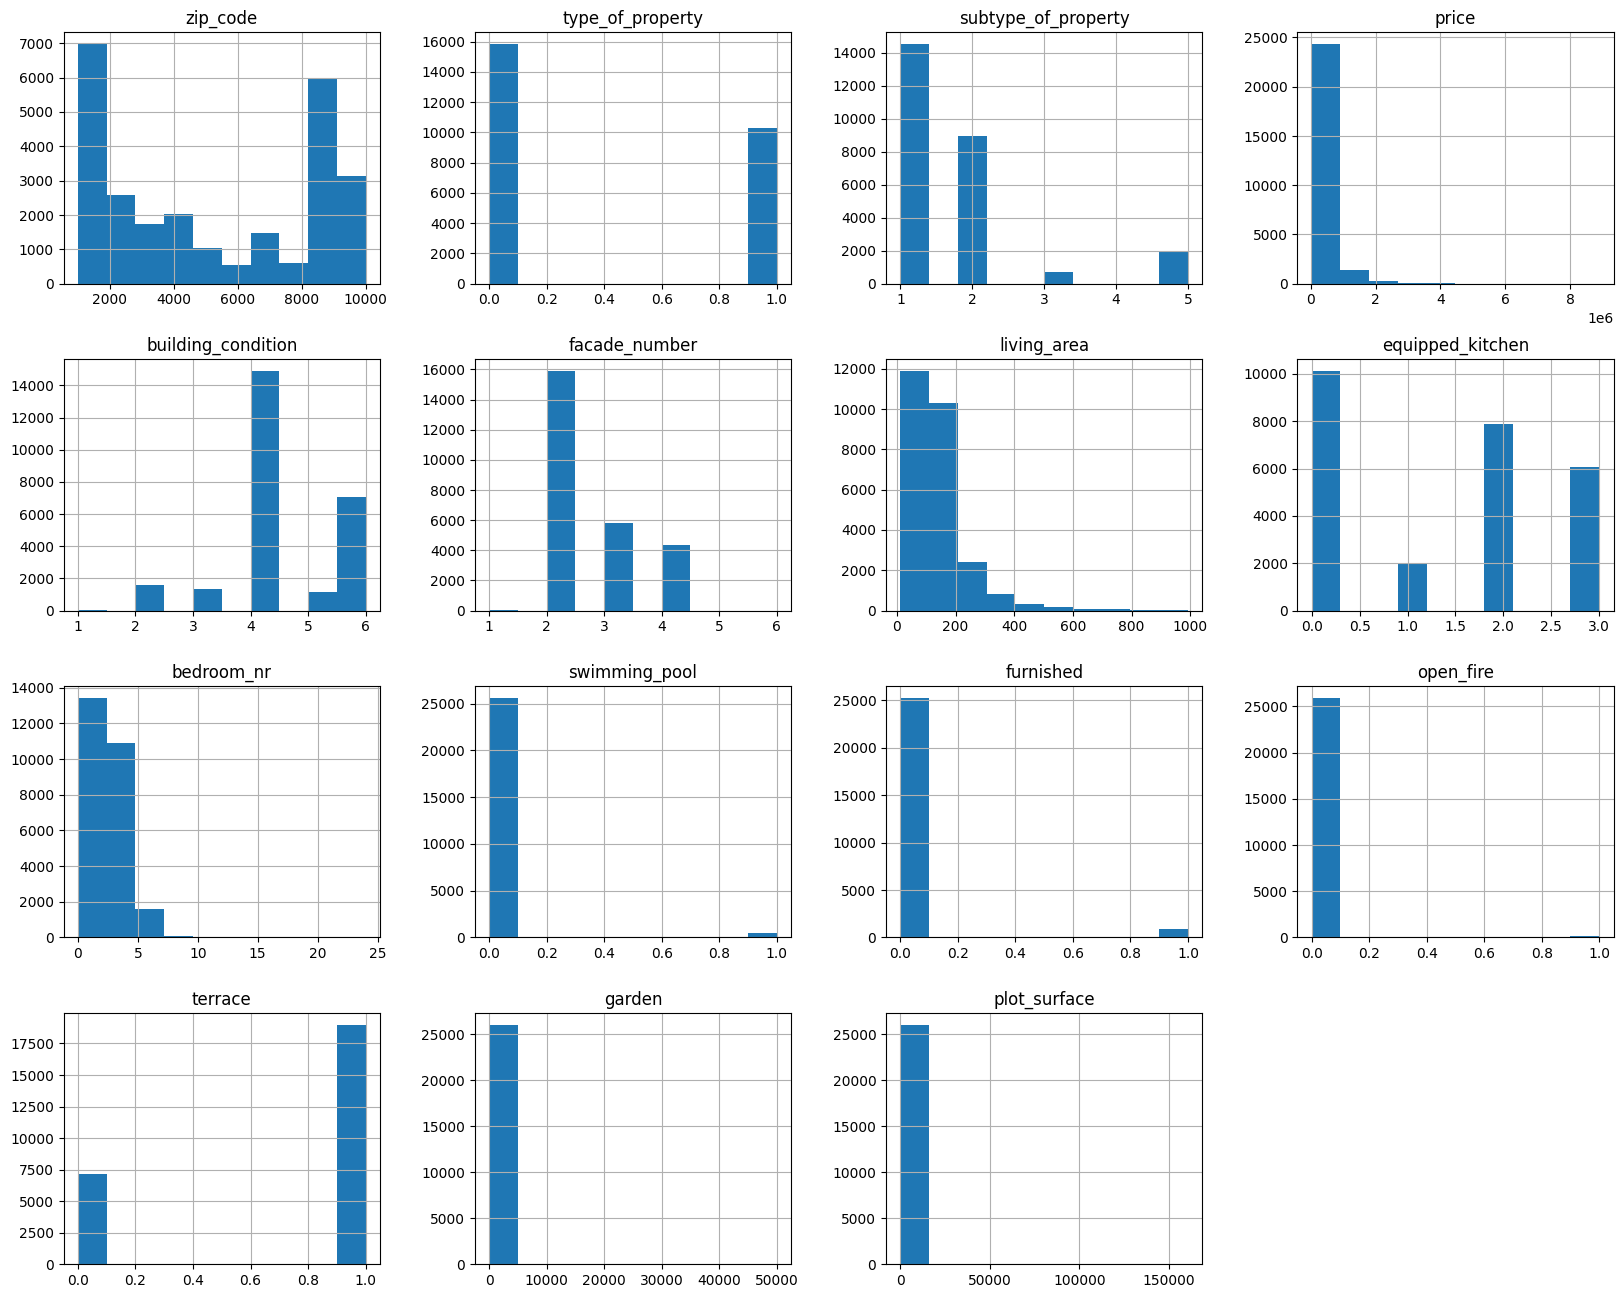

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,16))
ax = fig.gca()
df_encoded.hist(ax=ax)
plt.show()

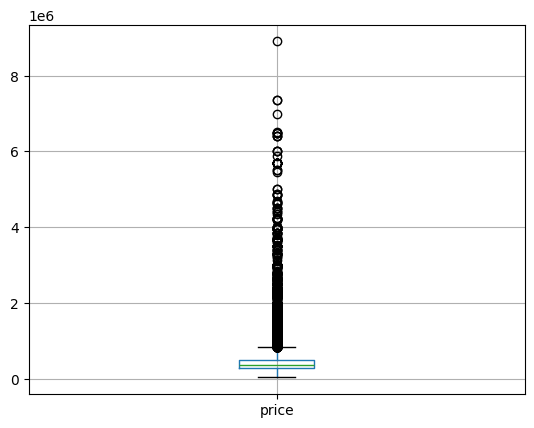

In [5]:
df_encoded[['price']].boxplot()
plt.show()

<Figure size 3000x2000 with 0 Axes>

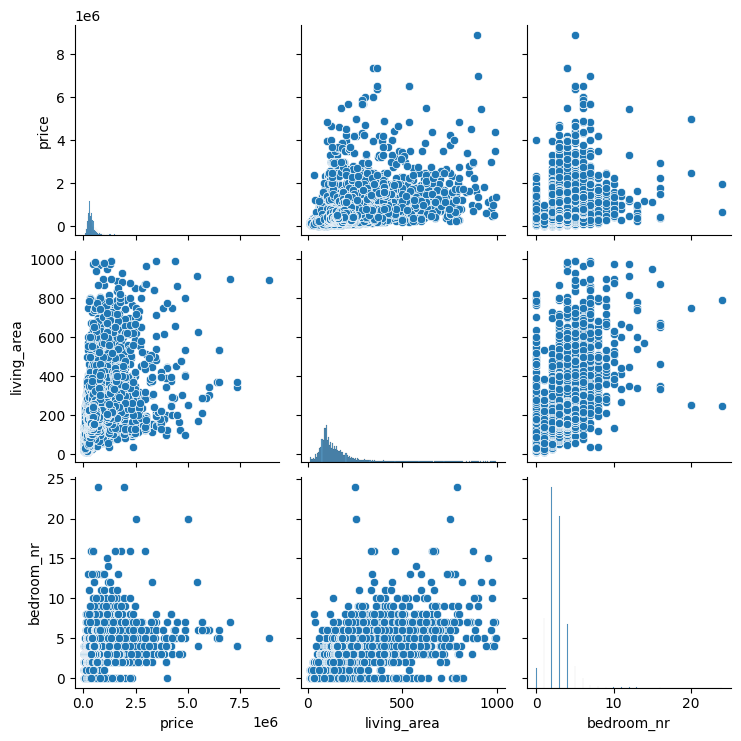

In [7]:
import seaborn as sns

pairplot = df_encoded[['price', 'living_area', 'bedroom_nr']]

plt.figure(figsize=(30,20))
sns.pairplot(pairplot)

In [8]:
df_encoded.describe().round(0)

,zip_code,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface
count,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0,26102.0
mean,5083.0,0.0,2.0,459060.0,4.0,3.0,144.0,1.0,3.0,0.0,0.0,0.0,1.0,101.0,405.0
std,3284.0,0.0,1.0,434678.0,1.0,1.0,97.0,1.0,1.0,0.0,0.0,0.0,0.0,654.0,2644.0
min,1000.0,0.0,1.0,27500.0,1.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1740.0,0.0,1.0,265000.0,4.0,2.0,88.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4470.0,0.0,1.0,350000.0,4.0,2.0,116.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,8460.0,1.0,2.0,491400.0,6.0,3.0,170.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,254.0
max,9992.0,1.0,5.0,8900000.0,6.0,6.0,992.0,3.0,24.0,1.0,1.0,1.0,1.0,50000.0,160737.0


### Calculating price per sqm

Will rely on living area, since more common and since many properties do not have an additional plot and since plot surface sometimes includes garden, sometimes does not.

In [9]:
# Add price per sqm (total surface)
df_encoded['price_per_m²_ts'] = (df_encoded['price'] / (df_encoded['living_area'] + df_encoded['plot_surface'])).round(2)

In [10]:
# Add price per sqm (living area)
df_encoded['price_per_m²_la'] = (df_encoded['price'] / df_encoded['living_area']).round(2)

### Get Coordinates for Communes

In [11]:
# Update the commune name for the specific rows
df_encoded.loc[19712, 'commune'] = 'Petit-Rœulx-lez-Nivelles'
df_encoded.loc[22750, 'commune'] = 'Petit-Rœulx-lez-Nivelles'

# Verify the changes
df_encoded.loc[[19712, 22750], 'commune']


19712    Petit-Rœulx-lez-Nivelles
22750    Petit-Rœulx-lez-Nivelles
Name: commune, dtype: object

In [12]:
from geopy.geocoders import Nominatim
import pandas as pd

# Get list of unique communes
communes = df_encoded['commune'].unique()

# Initialize geocoder
geolocator = Nominatim(user_agent="geoapi")

# Get latitude and longitude
def get_lat_lon(commune):
    location = geolocator.geocode(commune + ", Belgium")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Create a DataFrame with unique communes and their lat/lon
commune_lat_lon = pd.DataFrame(communes, columns=['commune'])
commune_lat_lon[['latitude', 'longitude']] = commune_lat_lon['commune'].apply(get_lat_lon).apply(pd.Series)

# Map the latitude and longitude to the original df_encoded
df_encoded = df_encoded.merge(commune_lat_lon, on='commune', how='left')

In [13]:
df_encoded.isna().sum()

zip_code               0
commune                0
province               0
type_of_property       0
subtype_of_property    0
price                  0
building_condition     0
facade_number          0
living_area            0
equipped_kitchen       0
bedroom_nr             0
swimming_pool          0
furnished              0
open_fire              0
terrace                0
garden                 0
plot_surface           0
price_per_m²_ts        0
price_per_m²_la        0
latitude               0
longitude              0
dtype: int64

In [ ]:
# Check the result
df_encoded.head()

,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,...,swimming_pool,furnished,open_fire,terrace,garden,plot_surface,price_per_m²_ts,price_per_m²_la,latitude,longitude
0,2600,Berchem,Antwerpen,0,1,149000.0,4,2,48,2,...,0,0,0,1,0,0,3104.17,3104.17,50.864923,4.294673
1,2100,Deurne,Antwerpen,0,1,248000.0,4,2,91,2,...,0,0,0,1,0,0,2725.27,2725.27,51.208490,4.471930
2,2660,Hoboken,Antwerpen,0,1,229000.0,6,2,100,0,...,0,0,0,1,0,0,2290.00,2290.00,51.179495,4.361785
3,1180,Uccle,Bruxelles,0,1,470000.0,4,2,179,3,...,0,0,0,1,0,0,2625.70,2625.70,50.803544,4.333844
4,2018,Antwerpen,Antwerpen,0,1,480000.0,5,2,116,2,...,0,0,0,1,0,0,4137.93,4137.93,51.221110,4.399708


In [ ]:
"""import folium

# Initialize map centered on Belgium
belgium_map = folium.Map(location=[50.8503, 4.3517], zoom_start=8)  # Centered roughly on Brussels

# Add points to the map
for _, row in df_encoded.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=1,  # Small marker size
            color="blue",
            fill=True,
            fill_opacity=0.5
        ).add_to(belgium_map)

# Show the map
belgium_map.save("belgium_map.html")
belgium_map"""


### Check Feature Correlation

In [15]:
# Select only numerical columns (e.g., int and float types)
numerical_df = df_encoded.select_dtypes(include=['number'])

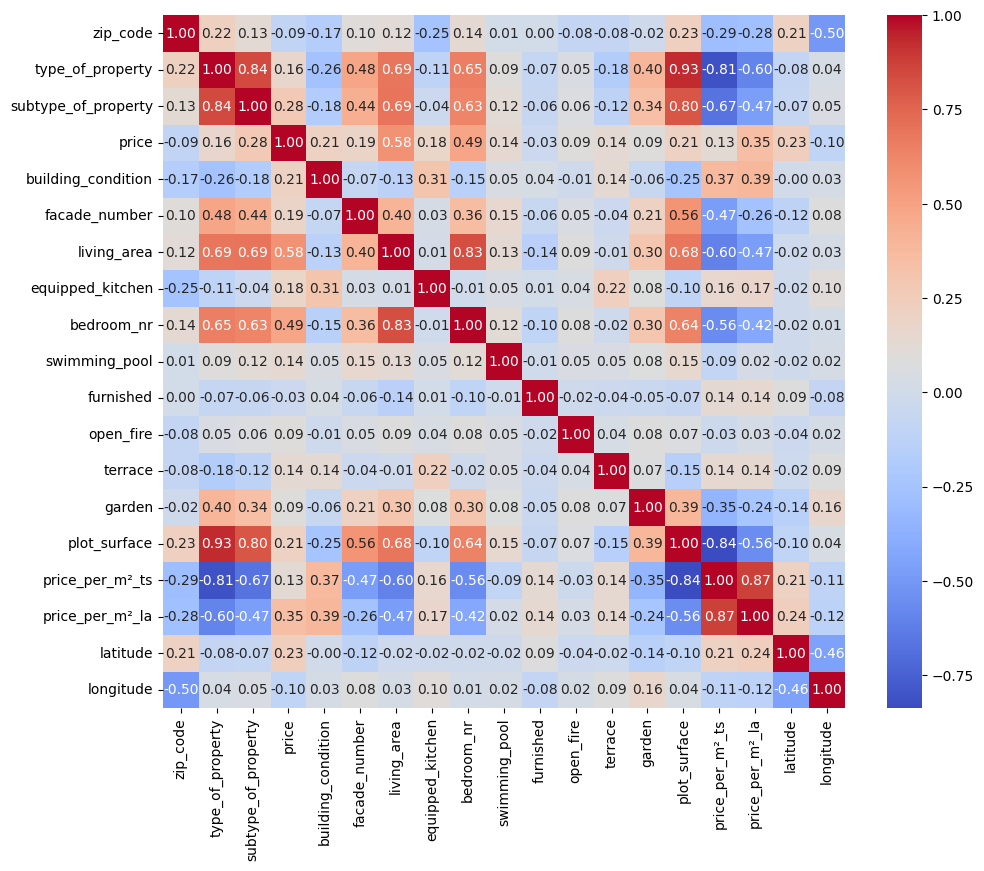

In [16]:
# Compute the Spearman correlation matrix
corr_matrix = numerical_df.corr(method='spearman')

# Display the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to make the heatmap larger
plt.figure(figsize=(11, 9))  # Adjust the size to your preference

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**What threshold should you use to remove correlated features?**

High correlation threshold: A common threshold to remove features with high correlation is 0.8 or 0.9. 

If two features have a correlation above this threshold, one of them can be dropped, as they contain similar information.

**Features to drop due to high correlation:**

* price_per_m²_ts (high negative correlation with subtype)
* plot_surface (high correlation with type and subtype)
* type_of_property (highly correlated with subtype)
* number_of_bedrooms (highly correlated to living_area; living_area is higher correlated with price)
  
**Features with high correlation to target:**
* living area
* price per m² (living area)
* subtype
* location
* building condition

In [17]:
df_encoded.columns

Index(['zip_code', 'commune', 'province', 'type_of_property',
       'subtype_of_property', 'price', 'building_condition', 'facade_number',
       'living_area', 'equipped_kitchen', 'bedroom_nr', 'swimming_pool',
       'furnished', 'open_fire', 'terrace', 'garden', 'plot_surface',
       'price_per_m²_ts', 'price_per_m²_la', 'latitude', 'longitude'],
      dtype='object')

### Feature Selection

In [18]:
# List of features to keep
features_to_keep = ['price', 'latitude', 'longitude', 'living_area', 'garden', 'subtype_of_property',  
                    'building_condition', 'equipped_kitchen', 'terrace', 'swimming_pool', 'facade_number']

df_selected = df_encoded[features_to_keep]

### Removing Outliers

In [19]:
# Calculate IQR for 'price'
Q1 = df_selected['price'].quantile(0.25)
Q3 = df_selected['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter data to remove outliers
df_filtered = df_selected[(df_selected['price'] >= lower_bound) & (df_selected['price'] <= upper_bound)]

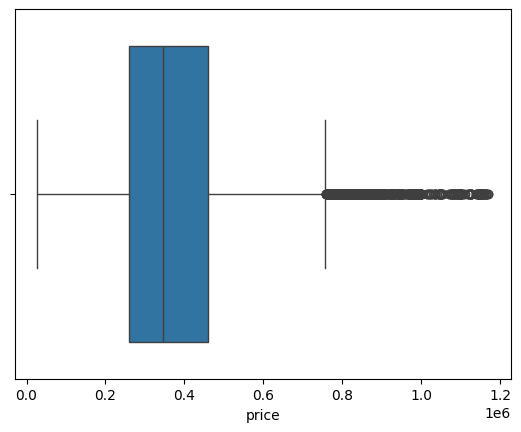

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot to visually inspect outliers
sns.boxplot(x=df_filtered['price'])
plt.show()


In [22]:
# Export final dataframe
df_filtered.to_csv('./data/2_engineered_data.csv', index=False)